<h1 align="center"><font color='green'>X Education</font></h1>

#### Porblem Statement :
X Education sells online courses to industry professionals.

Everyday many professionals who are interested in the courses land on their website and browse for courses.These users are classified as potential leads to take the course.

Currently the conversion rate is very poor. The company wishes to identify the most potential leads, also known as ‘Hot Leads’.

With the Hot Leads, the Sales team will focus more on communicating with the them rather than making calls to everyone.


#### Business Goal :
Help the X Education to select the most promising leads i.e. Hot Leads.

This can be achieved by building a logistic regression model and assigning lead score between 0 and 100 to each of the leads.

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

<h2 align="left"> <font color='brown'>Importing the libraries</font></h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# import header
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib import style
plt.style.use('seaborn')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Library to visualise missing values
import missingno as msno

<h2 align="left"> <font color='brown'>Reading Dataset</font></h2>

In [3]:
# Read datasets
leads = pd.read_csv('Leads.csv')

In [4]:
# Top five values
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Understanding the datasets
print('No. of Rows and columns :',leads.shape)

No. of Rows and columns : (9240, 37)


In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleanup based on initial undertanding

In [8]:
# columns can be dropped because these are unique numbers
drop_coulms = ['Prospect ID','Lead Number']

In [9]:
# columns can be dropped because these are not the key drivers
drop_coulms.extend(['Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','Tags'])

In [10]:
# Rename the Column headers, because column names are too big
leads.rename(columns = {"How did you hear about X Education":"HeardFrom"}, inplace=True)
leads.rename(columns = {"What matters most to you in choosing a course":"Moto"}, inplace=True)
leads.rename(columns = {"What is your current occupation":"Occupation"}, inplace=True)
leads.rename(columns = {"Receive More Updates About Our Courses":"GetUpdates"}, inplace=True)
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_interview_copy'}, inplace=True)

In [11]:
#Categorical Values cleanup
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Activity Index'].replace({'01.High': 'High', '02.Medium': 'Medium', '03.Low': 'Low'})

In [12]:
# Dropped the columns
leads.drop(drop_coulms,axis=1,inplace=True)

In [13]:
# changing select to Nan
leads = leads.replace('Select',np.nan)

<div class="alert alert-block alert-info">
<b>Inferences and action</b>
    <ul>
        <li>Dataset originally contains 37 columns and 9240 records</li>
        <li>Following columns has been removed because these are unique numbers and index</li>
        <ul>
          <li>Prospect ID</li>
          <li>Lead Number</li>
        </ul>
        <li>Following columns has been removed because these are not the key drivers for the analysis</li>
        <ul>
          <li>Update me on Supply Chain Content</li>
          <li>Get updates on DM Content</li>
          <li>I agree to pay the amount through cheque</li>
          <li>Tags</li>
        </ul>
        <li>Certain column names are give, gave aliases for those columns</li>
        <li>Target variable (Y) is Converted</li>
        <li>There are few values called Select, will convert those to NAN and will treat with other missing values</li>
    </ul>
</div>

<h2 align="left"> <font color='brown'>Impute/Remove missing values</font></h2>

In [14]:
# Get the null values
def get_null_values_columns():
    percentage_null_values = (leads.isnull().sum() / leads.shape[0])*100
    print (percentage_null_values[percentage_null_values > 0])

get_null_values_columns()

Lead Source                     0.389610
TotalVisits                     1.482684
Page Views Per Visit            1.482684
Last Activity                   1.114719
Country                        26.634199
Specialization                 36.580087
HeardFrom                      78.463203
Occupation                     29.112554
Moto                           29.318182
Lead Quality                   51.590909
Lead Profile                   74.188312
City                           39.707792
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64


### Visualising the missing values

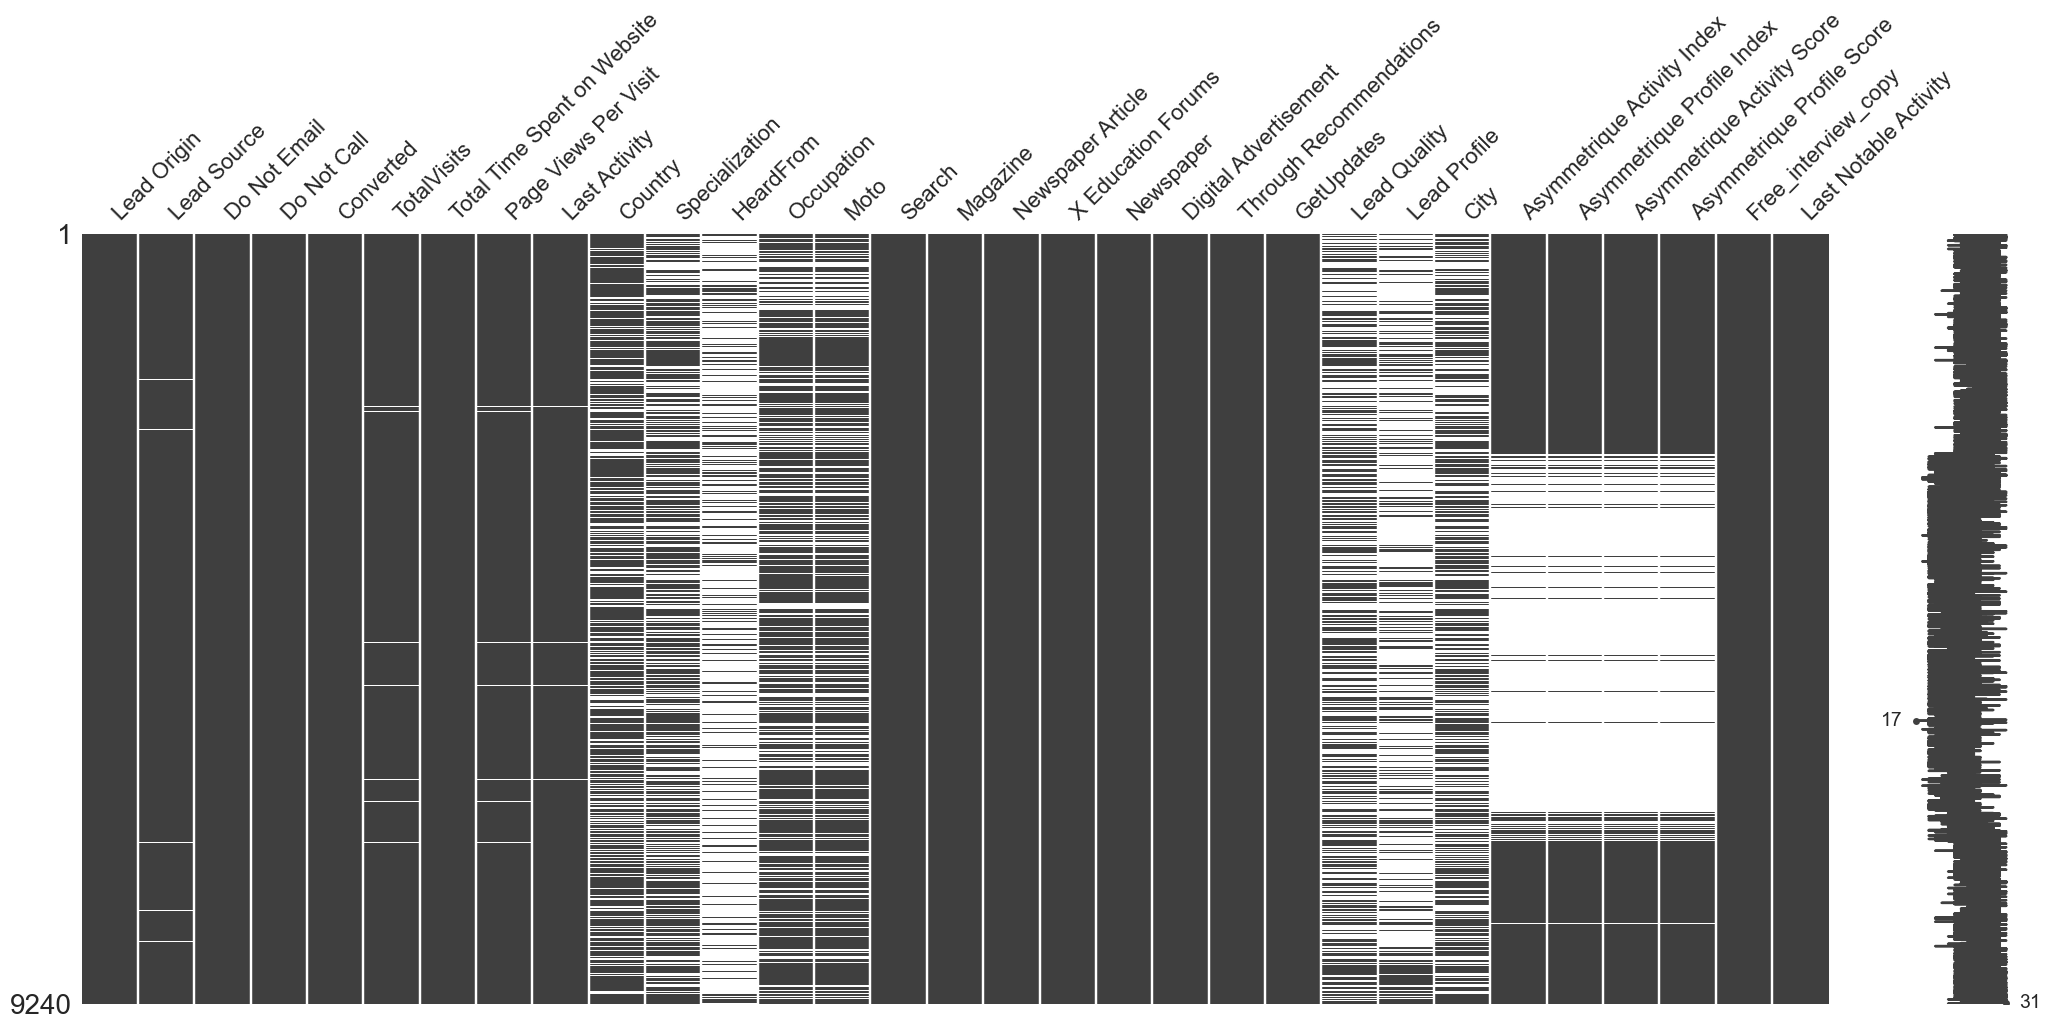

In [26]:
# Missing value using Matrix
msno.matrix(leads)
plt.show()

In [337]:
# Will remove those values having missing values more than 40 percent
def drop_cols():
  for col in leads.columns:
    if((100*(leads[col].isnull().sum()/len(leads.index))) >= 40):
      leads.drop(col,1, inplace=True)

drop_cols()

In [338]:
# Null values after dropping columns have null values for more than 40 percent
get_null_values_columns()

Lead Source              0.389610
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Country                 26.634199
Specialization          36.580087
Occupation              29.112554
Moto                    29.318182
City                    39.707792
dtype: float64


### Further analysis on other missing values
#### Country

In [339]:
leads.Country.value_counts()
# Country is a categorical variable and we can see that mode of India is more. 
# Hence will impute all the missing values to India

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [340]:
leads['Country'] = leads.Country.replace(np.nan,'India')
# Droping this column because data is highly skewed and pointing to India only. This will disbalance the dataset
leads.drop('Country',axis=1,inplace=True)

#### Specialization

In [341]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [342]:
# Will distribute the null values in other categories of specialization, because this is uniform in nature
def impute_null_values(column_name,value):
  null_value = int(round(leads[column_name].isna().sum() / value))
  categories = leads[column_name].unique()
  filtered_array = categories[~pd.isna(categories)]
  for col_index in range(0,value):
    null_indices = leads[leads[column_name].isna()][column_name].index[:null_value]
    leads.loc[null_indices,column_name] = filtered_array[col_index]

In [343]:
impute_null_values('Specialization',10)

In [344]:
get_null_values_columns()

Lead Source              0.389610
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Occupation              29.112554
Moto                    29.318182
City                    39.707792
dtype: float64


#### Occupation

In [345]:
leads['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [346]:
leads['Occupation'].isnull().sum()

2690

In [347]:
# Will distribute the null values in other categories of Occupation,to avoid skwness and Occupation can be a 
# good factor for this analysis, hence cannot drop due to skewness
impute_null_values('Occupation',6)

In [348]:
leads['Occupation'].isnull().sum()

2

In [349]:
# Remaining 2 null values will add to Unemployed 
leads.Occupation = leads.Occupation.replace(np.nan,'Unemployed')

In [350]:
get_null_values_columns()

Lead Source              0.389610
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Moto                    29.318182
City                    39.707792
dtype: float64


#### Moto

In [351]:
leads['Moto'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Moto, dtype: int64

In [352]:
leads['Moto'].isnull().sum()

2709

In [353]:
# This is highly skewed.Hence dropping
leads.drop('Moto',axis=1,inplace=True)

In [354]:
get_null_values_columns()

Lead Source              0.389610
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
City                    39.707792
dtype: float64


#### City

In [355]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [356]:
leads.City.isnull().sum()

3669

In [357]:
# Skewness to Mumbai, hence can be dropped
leads.drop('City',axis=1,inplace=True)

In [358]:
get_null_values_columns()

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64


#### Lead Source

In [359]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [360]:
leads['Lead Source'].isnull().sum()

36

In [361]:
# Google and Direct Traffic is the top 2, hence will impute the missing values in top 2 values
impute_null_values('Lead Source',2)

In [362]:
get_null_values_columns()

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64


#### Last Activity

In [363]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [364]:
leads['Last Activity'].isnull().sum()

103

In [365]:
# Email Opened  and SMS Sent is the top 2, hence will impute the missing values in top 2 values
impute_null_values('Last Activity',2)

In [366]:
get_null_values_columns()

TotalVisits             1.482684
Page Views Per Visit    1.482684
dtype: float64


#### TotalVisits

In [367]:
leads.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [368]:
leads.TotalVisits.isnull().sum()

137

In [369]:
# Replacing null values with mode of the column TotalVisits
leads['TotalVisits'] = leads.TotalVisits.replace(np.nan,leads.TotalVisits.mode()[0])

In [370]:
get_null_values_columns()

Page Views Per Visit    1.482684
dtype: float64


#### Page Views Per Visit

In [371]:
leads[['Page Views Per Visit']].head()

,Page Views Per Visit
0,0.0
1,2.5
2,2.0
3,1.0
4,1.0


In [372]:
leads[['Page Views Per Visit']].isnull().sum()

Page Views Per Visit    137
dtype: int64

In [373]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].mode()[0])

In [374]:
get_null_values_columns()
# All null value imputation is complete

Series([], dtype: float64)


<div class="alert alert-block alert-info">
<b>Inferences and action</b>
    <ul>
        <li>Total 16 columns are having null values.</li>
        <li>Removed all the null values above 40%</li>
        <li>Removed following columns because after null value imputation high skeweness in the data was found.
        <ul>
          <li>Country</li>
          <li>Moto alias of "What matters most to you in choosing a course"</li>
          <li>City</li>
        </ul>
        <li>Distributed null values uniformly for following columns because to maintain uniformity and avaod skeweness</li>
        <ul>
          <li>Specialization</li>
          <li>Occupation</li>
          <li>Lead Source</li>
          <li>Last Activity</li>
        </ul>
        <li>Imputed null values for following columns with null values</li>
        <ul>
          <li>TotalVisits</li>
          <li>Page Views Per Visit</li>
        </ul>
    </ul>
</div>

<h2 align="left"> <font color='brown'>Data Visualization</font></h2>

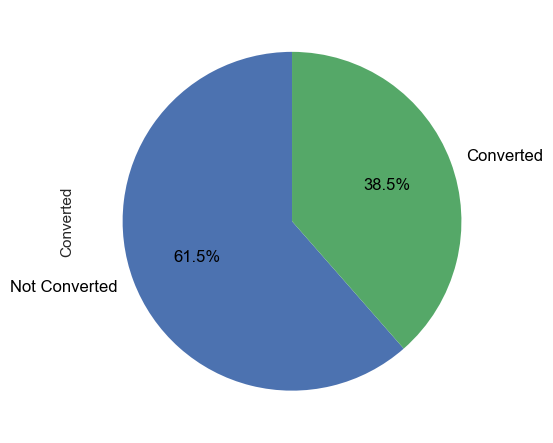

In [375]:
# Target
target = round(leads.Converted.value_counts(normalize=True)*100,2)
x = ['Not Converted','Converted']
target.plot.pie(labels=x,autopct='%1.1f%%',
                textprops={'fontsize': 12, 'fontweight' : 8, 'color' : 'Black'}, startangle=90)
plt.show()

#### Numeric Variable

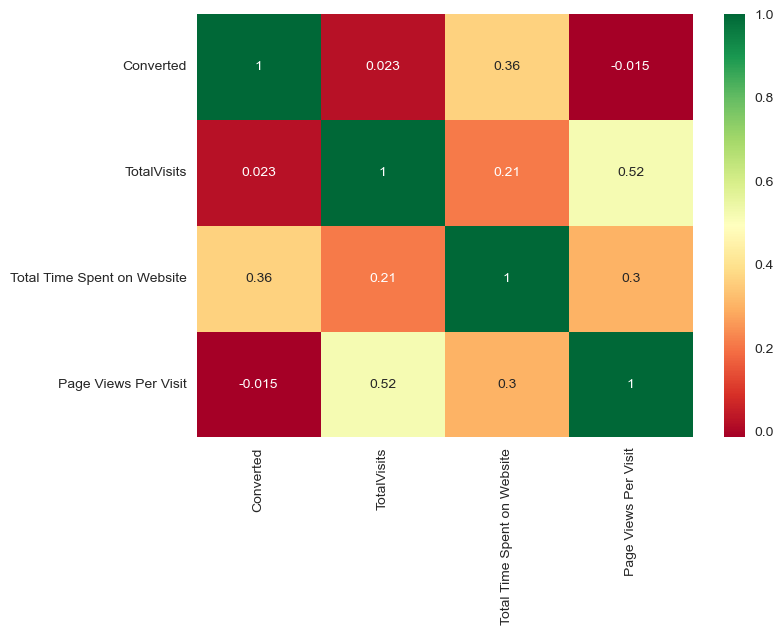

In [376]:
# Numerical Variables
num_category = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

sns.heatmap(leads[num_category].corr(), cmap="RdYlGn", annot=True)
plt.show()

# There is no coorelation.

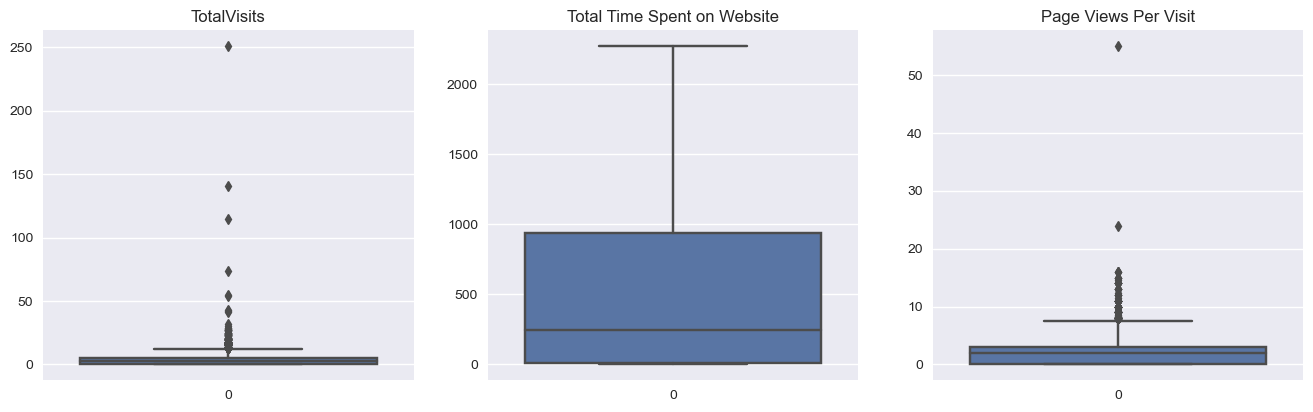

In [377]:
# Box plot
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Total Time Spent on Website')
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(2,4,3)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

## Outlier Treatment

In [378]:
# TotalVisits and Page Views Per Visit has outliers
leads[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.394156,2.327787
std,4.836682,2.164258
min,0.000000,0.000000
5%,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000


In [379]:
# Correcting outliers from medians
def replace_outliers_with_median(column,value):
  indices = leads[leads[column] > value].TotalVisits.index
  leads.loc[indices,column] = leads[column].median()

In [380]:
replace_outliers_with_median('Page Views Per Visit',9)
replace_outliers_with_median('TotalVisits',9)

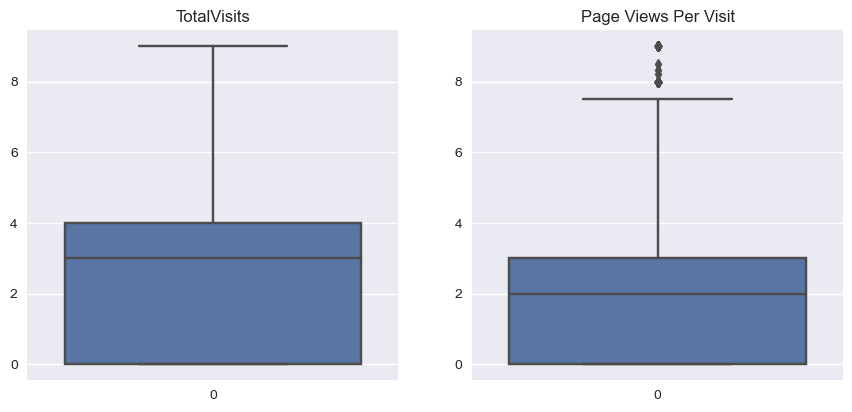

In [381]:
# Box Plots after outlier treatment
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('TotalVisits')
sns.boxplot(leads.TotalVisits)
plt.subplot(2,4,2)
plt.title('Page Views Per Visit')
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

<div class="alert alert-block alert-info">
<b>Inferences and action</b>
    <ul>
        <li>Total conversion rate is 38.5%</li>
        <li>There is no coorelation between following columns
        <ul>
          <li>Converted</li>
          <li>TotalVisits</li>
          <li>Total Time Spent on Website</li>
          <li>Page Views Per Visit</li>
        </ul>
        <li>Outliers are present in following columns</li>
        <ul>
          <li>TotalVisits</li>
          <li>Page Views Per Visit</li>
        </ul>
    </ul>
</div>

#### Categorical Data

In [382]:
# User defined function Used for visualisation

#Sub Plot

def subplot(features):
    for i in range(0,len(features)):
        #print(features[i])
        plt.subplot(2,2,i+1)
        chart = (sns.countplot(x=leads[features[i]],hue=leads.Converted))

        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

         # Adding and formatting title
         #plt.title(features[i], fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})

        # Labeling Axes
        plt.xlabel(features[i], fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.show()


#Count Plot

def count_plot(feature_name,hue,plot_title,x_lablel,y_lablel):
    chart = (sns.countplot(x=leads[feature_name],hue=hue))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

    # Adding and formatting title
    plt.title(plot_title, fontdict={'fontsize': 10, 'fontweight' : 10, 'color' : 'Black'})

    # Labeling Axes
    plt.xlabel(x_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.ylabel(y_lablel, fontdict={'fontsize': 8, 'fontweight' : 8, 'color' : 'Brown'})
    plt.show()

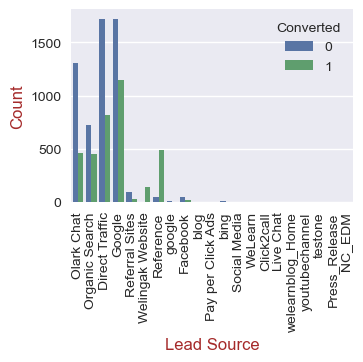

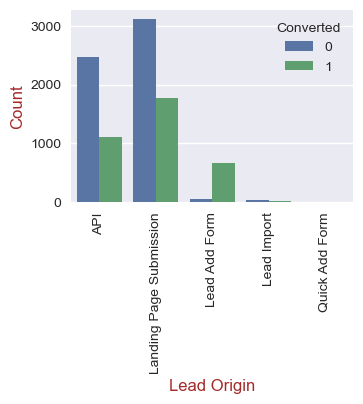

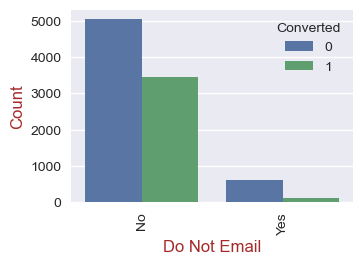

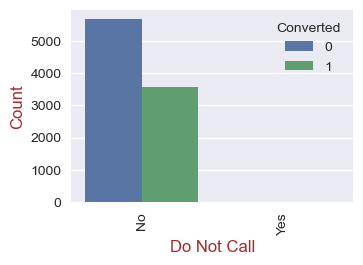

In [383]:
features = ['Lead Source','Lead Origin','Do Not Email','Do Not Call']
subplot(features)

# Data is highly skwed for Do Not call, Mostly all the data is pointing to No, hence will not make sense evaluating this feature
leads.drop('Do Not Call',axis=1,inplace=True)

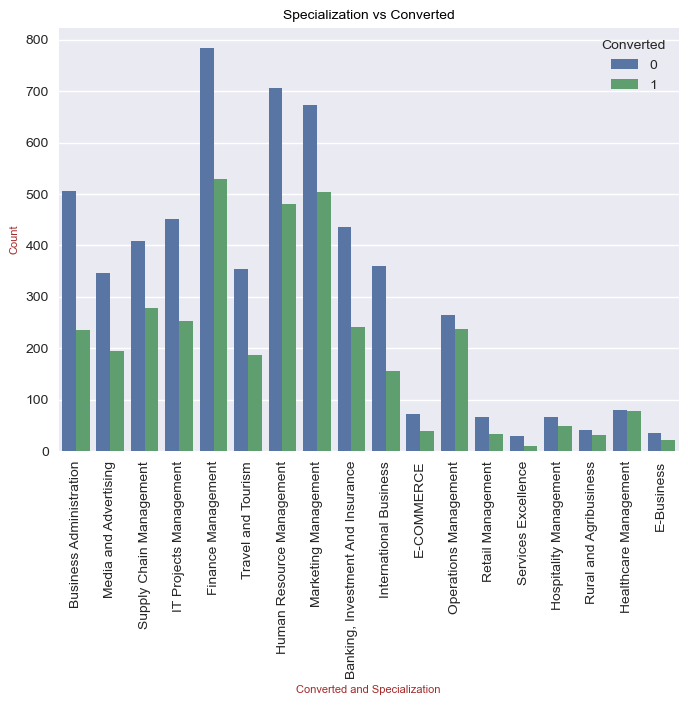

In [384]:
count_plot('Specialization',leads.Converted,'Specialization vs Converted',
           'Converted and Specialization','Count')

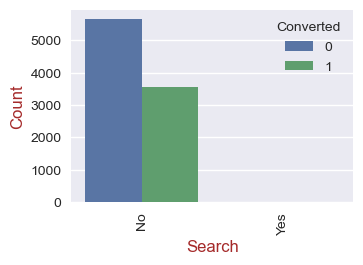

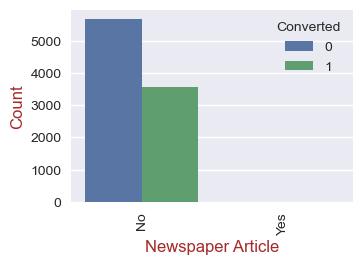

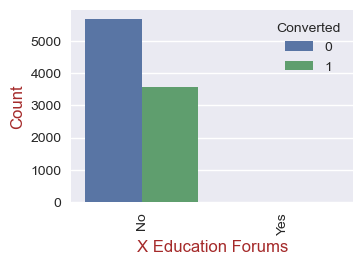

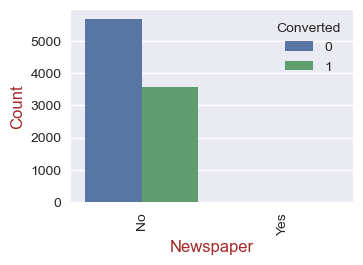

In [385]:
features = ['Search',
'Newspaper Article',
'X Education Forums',
'Newspaper']
subplot(features)

# These features are highly skewed, hence dropping
leads.drop(features, axis=1, inplace=True)

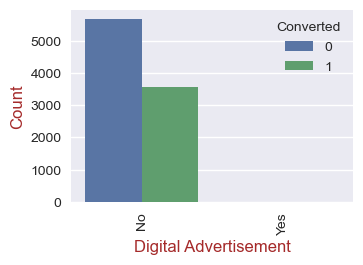

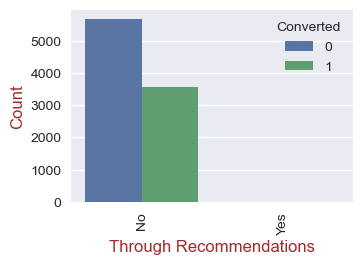

In [386]:
features = ['Digital Advertisement',
'Through Recommendations']
subplot(features)

# these are skewed to, hence dropping
leads.drop(features, axis=1, inplace=True)

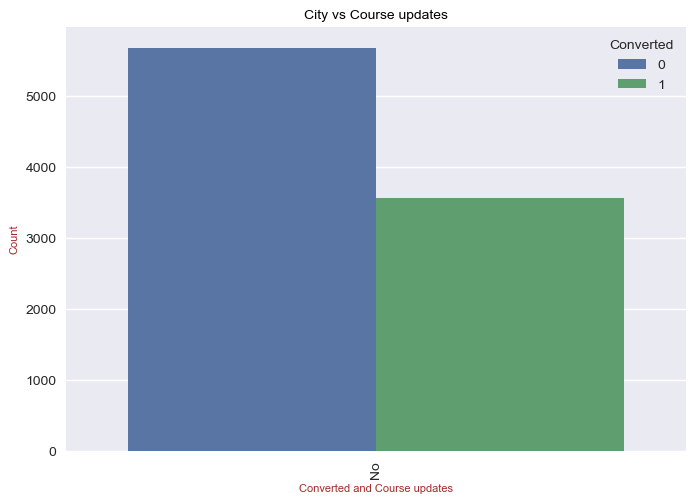

In [387]:
count_plot('GetUpdates',leads.Converted,'City vs Course updates',
           'Converted and Course updates','Count')


# Receive More Updates About Our Courses can be droped because of skewness in the data
leads.drop('GetUpdates',axis=1,inplace=True)

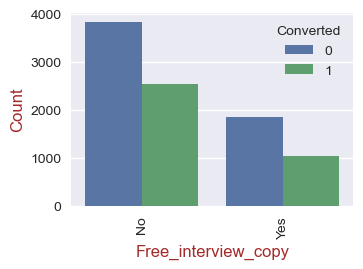

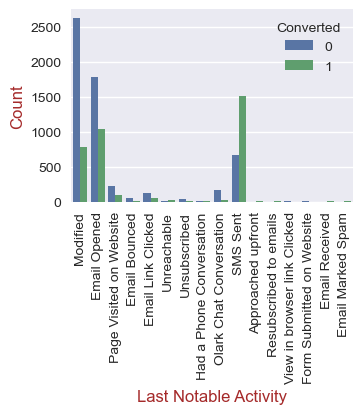

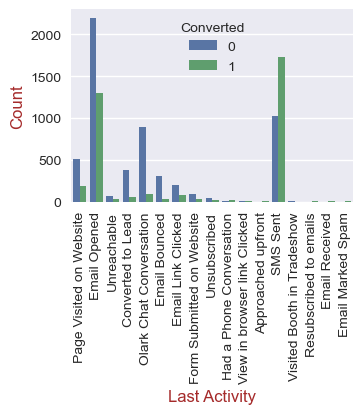

In [388]:
features = ['Free_interview_copy','Last Notable Activity','Last Activity']
subplot(features)

# droping the columns - A free copy of Mastering The Interview because it is not putting any value in the analysis
# Last Notable Activity','Last Activity both are same, hence dropping Last Notable Activity
leads.drop(['Last Notable Activity'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
<b>Inferences and action</b>
    <ul>
        <li>Following columns are dropped becuase of skewness.</li>
        <ul>
          <li>Do Not Call</li>
          <li>Search</li>
          <li>Newspaper Article</li>
          <li>X Education Forumns</li>
          <li>Newspaper</li>
          <li>Digital Advertisement</li>
          <li>Thorough Recomendations</li>
          <li>GetUpdates</li>
        </ul>
        <li>12 columns left after cleaning.</li>
    </ul>
    
<b>Now we will proceed with the model preparation</b>
</div>

<h2 align="left"> <font color='brown'>Data Preperation</font></h2>

#### Dummy value creation

In [389]:
categorical = leads.select_dtypes(include=['object']).columns
categorical

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'Occupation', 'Magazine', 'Free_interview_copy'],
      dtype='object')

In [390]:
def make_binary_dummy(columlist):
  return columlist.map({'No':0,'Yes':1})

catergory_list = ['Do Not Email','Magazine','Free_interview_copy']

leads[catergory_list] = leads[catergory_list].apply(make_binary_dummy)

In [391]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Magazine,Free_interview_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Business Administration,Unemployed,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Business Administration,Unemployed,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Business Administration,Unemployed,0,0


In [392]:
# No more categories, so we will be good to create dummy variable
(leads['Lead Origin'].value_counts(normalize=True))*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

### Lead Source
- To many categories, will create more number of dummy variable
- Will convert low frequency categories to one value called LeadSource_Others

In [393]:
value_counts = leads['Lead Source'].value_counts(normalize=True)*100
value_counts

Google               31.038961
Direct Traffic       27.521645
Olark Chat           19.188312
Organic Search       12.683983
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [394]:
# Finding low frequencies categores
low_freq_categories = value_counts [value_counts < 10].index
low_freq_categories

Index(['Reference', 'Welingak Website', 'Referral Sites', 'Facebook', 'bing',
       'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'],
      dtype='object')

In [395]:
# can merge Google and google to one
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
# Converting low frequency categories to one value called LeadSource_Others
leads['Lead Source'] = leads['Lead Source'].replace(low_freq_categories,'LeadSource_Others')

In [396]:
value_counts = leads['Lead Source'].value_counts(normalize=True)*100
value_counts

Google               31.093074
Direct Traffic       27.521645
Olark Chat           19.188312
Organic Search       12.683983
LeadSource_Others     9.512987
Name: Lead Source, dtype: float64

### Last Activity
- To many categories, will create more number of dummy variable
- Will convert low frequency categories to one value called LastActivity_Others

In [397]:
value_counts_last_actity = leads['Last Activity'].value_counts(normalize=True)*100
value_counts_last_actity

Email Opened                    37.748918
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          7.489177
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [398]:
# Finding low frequencies categores
low_freq_last_activity_category = value_counts_last_actity[value_counts_last_actity < 1].index
low_freq_last_activity_category

Index(['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],
      dtype='object')

In [399]:
# Converting low frequency categories to one value called LastActivity_Others
leads['Last Activity'] = leads['Last Activity'].replace(low_freq_last_activity_category,'LastActivity_Others')

In [400]:
value_counts_last_actity = leads['Last Activity'].value_counts(normalize=True)*100
value_counts_last_actity

Email Opened                 37.748918
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       7.489177
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
LastActivity_Others           1.212121
Unreachable                   1.006494
Name: Last Activity, dtype: float64

In [401]:
# Creating dummy variables
lead_origin = pd.get_dummies(leads['Lead Origin'],drop_first=True)
lead_source = pd.get_dummies(leads['Lead Source'],drop_first = True)
last_activity = pd.get_dummies(leads['Last Activity'],drop_first = True)
speciality = pd.get_dummies(leads['Specialization'],drop_first = True)
current_occu = pd.get_dummies(leads['Occupation'],drop_first = True)

In [402]:
leads = pd.concat([leads,lead_origin,lead_source,last_activity,current_occu,speciality], axis = 1)

In [403]:
leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],axis = 1,inplace = True )

In [404]:
# After dummy varaible creation, columns have been increased to 51
leads.shape

(9240, 46)

In [405]:
# Following are the final set of columns. Now we will perform feature elimination techniques
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Do Not Email                 9240 non-null   int64  
 1   Converted                    9240 non-null   int64  
 2   TotalVisits                  9240 non-null   float64
 3   Total Time Spent on Website  9240 non-null   int64  
 4   Page Views Per Visit         9240 non-null   float64
 5   Magazine                     9240 non-null   int64  
 6   Free_interview_copy          9240 non-null   int64  
 7   Landing Page Submission      9240 non-null   uint8  
 8   Lead Add Form                9240 non-null   uint8  
 9   Lead Import                  9240 non-null   uint8  
 10  Quick Add Form               9240 non-null   uint8  
 11  Google                       9240 non-null   uint8  
 12  LeadSource_Others            9240 non-null   uint8  
 13  Olark Chat        

# <h2 align="left"> <font color='brown'>Manual Feature Elimination</font></h2>

In [ ]:
# Creating heatmap to see the high coorelation features.
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr(),cmap="RdYlGn", annot=True)
plt.show()

In [407]:
# Magazine is not showing any correlation, hence dropping
leads.drop('Magazine',axis=1,inplace=True)

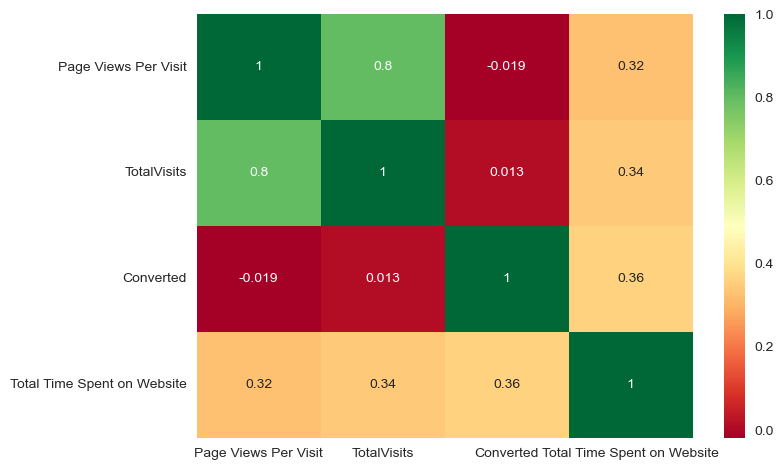

In [408]:
# Page Views Per Visit , TotalVisits showing high coorelation, Lets check seperately
features = ['Page Views Per Visit','TotalVisits','Converted','Total Time Spent on Website']
sns.heatmap(leads[features].corr(),cmap="RdYlGn", annot=True)
plt.show()

In [409]:
# High correlation between Page Views Per Visit and TotalVisits. We can drop anyone
leads.drop('Page Views Per Visit',axis=1,inplace=True)

In [410]:
# Removed two columns manually
leads.shape

(9240, 44)

<h2 align="left"> <font color='brown'>Model Preperation</font></h2>

In [411]:
# 70% train data and 30% test data
leads_train,leads_test = train_test_split(leads,train_size=0.7,test_size=0.3,
                                          random_state=100)

In [412]:
# Training data
y_train = leads_train.pop('Converted')
X_train = leads_train

In [413]:
# Test data
y_test = leads_test.pop('Converted')
X_test = leads_test

#### Scale variable

In [414]:
def scale_features(data_to_scale):
    # using standard scaler for scaling the features
    scaler = StandardScaler()
    # fetching int64 and float64 dtype columns from dataframe for scaling
    num_cols=data_to_scale.select_dtypes(include=['int64','float64']).columns
    data_to_scale[num_cols] = scaler.fit_transform(data_to_scale[num_cols])

In [415]:
scale_features(X_train)

In [416]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Free_interview_copy,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,LeadSource_Others,...,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
1871,-0.291638,-1.214335,-0.885371,-0.673169,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,-0.291638,0.544160,0.005716,1.485511,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,-0.291638,0.983784,-0.691418,-0.673169,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,0.983784,1.365219,-0.673169,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3934,-0.291638,-1.214335,-0.885371,-0.673169,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 align="left"> <font color='brown'>Model Training</font></h2>

In [417]:
# Function to create model
def model_creation(X,y):
    model = sm.GLM(y,X,family = sm.families.Binomial()).fit()
    print(model.summary())
    return model

# Function to calculate VIF
def vif_calculator (X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
# Function for feature selection using RFE
def feature_selection(X,y,num_features):
    lm = LogisticRegression()
    lm.fit(X,y)
    
    rfe = RFE(lm,n_features_to_select=num_features)
    rfe = rfe.fit(X, y)
    
    print(list(zip(X.columns,rfe.support_,rfe.ranking_)))
    print ('='*50)
    print('Selected Columns')
    print('----------')
    print(X.columns[rfe.support_])
    print ('='*50)
    print('Not Selected Columns')
    print('----------')
    print(X.columns[~rfe.support_])
    
    return X.columns[rfe.support_]

#### Model 1

This model will be prepared with all the columns

In [418]:
X_train_with_constant = sm.add_constant(X_train)
model_1 = model_creation(X_train_with_constant,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.8
Date:                Sat, 13 Jan 2024   Deviance:                       5597.5
Time:                        23:27:38   Pearson chi2:                 6.77e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3712
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [419]:
vif_calculator(X_train_with_constant)

                      Variables        VIF
0                         const  68.014558
15                 Email Opened   6.223985
20                     SMS Sent   5.766514
25                   Unemployed   5.690998
10            LeadSource_Others   5.170188
6                 Lead Add Form   4.747918
26         Working Professional   3.550764
11                   Olark Chat   3.477023
18      Olark Chat Conversation   3.407848
19      Page Visited on Website   2.750100
30           Finance Management   2.689966
13                Email Bounced   2.592947
5       Landing Page Submission   2.563405
36         Marketing Management   2.541192
33    Human Resource Management   2.512494
24                      Student   2.486620
9                        Google   2.453425
22                    Housewife   2.275021
2                   TotalVisits   2.221923
23                        Other   2.104838
4           Free_interview_copy   2.070231
27      Business Administration   2.018717
42      Sup

<div class="alert alert-block alert-info">
<b>Inference</b>
    
Model 1 is having lots of features with more P value and few having high VIF. 
Hence better to perform the feature selection using RFE.
</div>

## Model 2

In [420]:
# Feature selection using RFE
# Number of features to be selected is 20
selected_column = feature_selection(X_train,y_train,20) 

[('Do Not Email', True, 1), ('TotalVisits', False, 10), ('Total Time Spent on Website', True, 1), ('Free_interview_copy', False, 21), ('Landing Page Submission', False, 8), ('Lead Add Form', True, 1), ('Lead Import', True, 1), ('Quick Add Form', False, 11), ('Google', False, 3), ('LeadSource_Others', True, 1), ('Olark Chat', True, 1), ('Organic Search', False, 23), ('Email Bounced', False, 24), ('Email Link Clicked', True, 1), ('Email Opened', True, 1), ('Form Submitted on Website', True, 1), ('LastActivity_Others', True, 1), ('Olark Chat Conversation', True, 1), ('Page Visited on Website', True, 1), ('SMS Sent', True, 1), ('Unreachable', True, 1), ('Housewife', False, 7), ('Other', True, 1), ('Student', True, 1), ('Unemployed', True, 1), ('Working Professional', True, 1), ('Business Administration', False, 4), ('E-Business', False, 20), ('E-COMMERCE', False, 5), ('Finance Management', False, 15), ('Healthcare Management', False, 2), ('Hospitality Management', True, 1), ('Human Resourc

In [421]:
# Features selected by RFE
X_train_rfe_selected = X_train[selected_column]
X_train_rfe_selected.shape

(6468, 20)

In [422]:
X_train_rfe_selected_with_constant = sm.add_constant(X_train_rfe_selected)
model_2 = model_creation(X_train_rfe_selected_with_constant,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.1
Date:                Sat, 13 Jan 2024   Deviance:                       5648.2
Time:                        23:27:41   Pearson chi2:                 6.80e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<div class="alert alert-block alert-info">
<b>Inference</b>
    
Model 2 is prepared with features selected by RFE. Still there are P values high for some features, 
will manually revove them and check. 
</div>

## Model 3

In [423]:
drop_features = ['Form Submitted on Website','Lead Import','LeadSource_Others',
                 'Olark Chat Conversation','Rural and Agribusiness'] 
X_train_rfe_selected_with_constant_revised = X_train_rfe_selected_with_constant.drop(drop_features,axis=1)

In [424]:
model_3 = model_creation(X_train_rfe_selected_with_constant_revised,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.6
Date:                Sat, 13 Jan 2024   Deviance:                       5659.2
Time:                        23:27:41   Pearson chi2:                 6.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [425]:
vif_calculator(X_train_rfe_selected_with_constant_revised)

                      Variables        VIF
0                         const  15.754611
13                   Unemployed   2.715805
6                  Email Opened   2.072578
14         Working Professional   2.057446
9                      SMS Sent   2.011967
12                      Student   1.595088
11                        Other   1.428929
8       Page Visited on Website   1.359506
4                    Olark Chat   1.310592
2   Total Time Spent on Website   1.239851
1                  Do Not Email   1.141759
5            Email Link Clicked   1.131154
3                 Lead Add Form   1.103824
7           LastActivity_Others   1.074940
10                  Unreachable   1.046178
15       Hospitality Management   1.006165


<div class="alert alert-block alert-info">
<b>Inference</b>
    
Model 3 looks good because after removing following columns, p < 0.05 and VIF < 10 value . 
<li>Form Submitted on Website</li>
<li>Lead Import</li>
<li>LeadSource_Others</li>
<li>Olark Chat Conversation</li>
<li>Rural and Agribusiness</li>
</div>

<h2 align="left"> <font color='brown'>Model Evaluation</font></h2>

In [426]:
# Getting the predicted values on the train set
y_train_pred = model_3.predict(X_train_rfe_selected_with_constant_revised)

y_train_pred[:10]

1871    0.279353
6795    0.256209
3516    0.324513
8105    0.823325
3934    0.279353
4844    0.951676
3297    0.132448
8071    0.987844
987     0.153649
7423    0.901419
dtype: float64

In [427]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_original':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted_original,Converted_Prob
1871,0,0.279353
6795,0,0.256209
3516,0,0.324513
8105,0,0.823325
3934,0,0.279353


In [428]:
y_train_pred_final['Predicted_0.5'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head(10)

,Converted_original,Converted_Prob,Predicted_0.5
1871,0,0.279353,0
6795,0,0.256209,0
3516,0,0.324513,0
8105,0,0.823325,1
3934,0,0.279353,0
4844,1,0.951676,1
3297,0,0.132448,0
8071,1,0.987844,1
987,0,0.153649,0
7423,1,0.901419,1


In [429]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_original, y_train_pred_final['Predicted_0.5'] )
print(confusion)

[[3530  472]
 [ 789 1677]]


In [430]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3530       |   472
# converted           789        |   1677  


### Other Metrices

In [431]:
def metirices(confusion_matrix,predicted):
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
    
    print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted_original, 
                                                       y_train_pred_final[predicted])*100)
    print('Sensitity : ',(TP / float(TP+FN))*100)
    print('Specificity : ', (TN / float(TN+FP))*100)
    print('False Positive Rate : ',(FP/ float(TN+FP))*100)
    print('precision : ',(TP / float(TP+FP))*100)
                  
    

In [432]:
metirices(confusion,'Predicted_0.5')

Accuracy : 80.50401978973407
Sensitity :  68.00486618004867
Specificity :  88.20589705147425
False Positive Rate :  11.794102948525737
precision :  78.0362959516054


### ROC Curve

In [433]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

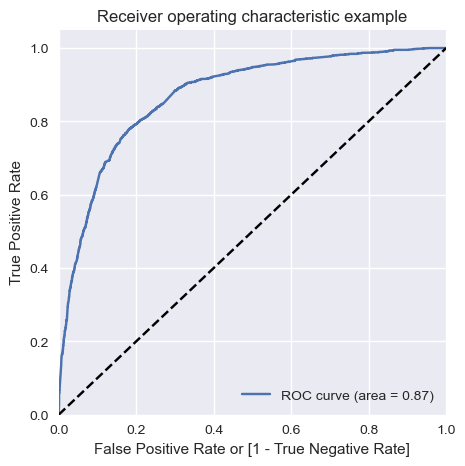

In [434]:
draw_roc(y_train_pred_final.Converted_original, y_train_pred_final.Converted_Prob)

<div class="alert alert-block alert-info">
<b>Inference</b>
<li>Area of ROC is 0.87 which is a good curve</li>
<li>Accuracy : 80.50</li>
<li>Sensitity :  68.00</li>
<li>Specificity :  88.205</li>
<li>False Positive Rate :  11.79</li>
<li>precision :  78.03</li>
    
<b>Above values are from the randomly selected threshold = 0.5. Now we have to find the optimal cutoff Threshold value of Probability.
</div>

### Optimal Theshold

In [435]:
# Will see the probabilities for different thresholds

threshold_values = [float(number/10) for number in range(10)]
for threshold in threshold_values:
    y_train_pred_final[threshold] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > threshold else 0)

In [436]:
y_train_pred_final.head(10)

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0
4844,1,0.951676,1,1,1,1,1,1,1,1,1,1,1
3297,0,0.132448,0,1,1,0,0,0,0,0,0,0,0
8071,1,0.987844,1,1,1,1,1,1,1,1,1,1,1
987,0,0.153649,0,1,1,0,0,0,0,0,0,0,0
7423,1,0.901419,1,1,1,1,1,1,1,1,1,1,1


In [437]:
metrices_with_different_prob = pd.DataFrame(columns = ['Probabiity','Accuracy','Sensitivity','Specivicity'])

threshold_values = [float(number/10) for number in range(10)]

for threshold in threshold_values:
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted_original, y_train_pred_final[threshold] )
    total=sum(sum(confusion))
    accuracy = (confusion[0,0]+confusion[1,1])/total
    
    specivicity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
    sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    metrices_with_different_prob.loc[threshold] =[ threshold ,accuracy,sensitivity,specivicity]

print(metrices_with_different_prob)

     Probabiity  Accuracy  Sensitivity  Specivicity
0.0         0.0  0.381262     1.000000     0.000000
0.1         0.1  0.587044     0.972019     0.349825
0.2         0.2  0.729746     0.917680     0.613943
0.3         0.3  0.782313     0.832117     0.751624
0.4         0.4  0.804267     0.763585     0.829335
0.5         0.5  0.805040     0.680049     0.882059
0.6         0.6  0.786333     0.574615     0.916792
0.7         0.7  0.766543     0.484590     0.940280
0.8         0.8  0.738250     0.369424     0.965517
0.9         0.9  0.685683     0.195864     0.987506


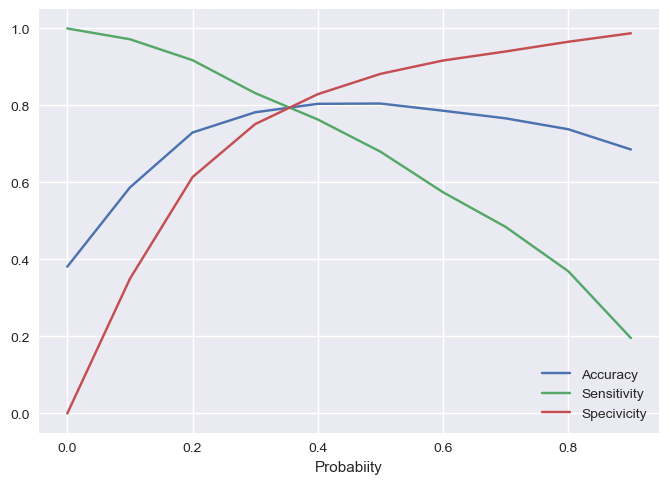

In [438]:
metrices_with_different_prob.plot.line(x='Probabiity', y=['Accuracy','Sensitivity','Specivicity'])
plt.show()

In [439]:
#From the curve above, 0.38 is the optimum point to take it as a cutoff probability.
y_train_pred_final['predicted_0.38'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.38 else 0)

# checking head
y_train_pred_final.head(10)

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.38
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0
4844,1,0.951676,1,1,1,1,1,1,1,1,1,1,1,1
3297,0,0.132448,0,1,1,0,0,0,0,0,0,0,0,0
8071,1,0.987844,1,1,1,1,1,1,1,1,1,1,1,1
987,0,0.153649,0,1,1,0,0,0,0,0,0,0,0,0
7423,1,0.901419,1,1,1,1,1,1,1,1,1,1,1,1


In [440]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_original, y_train_pred_final['predicted_0.38'] )
print(confusion)

[[3266  736]
 [ 542 1924]]


In [441]:
metirices(confusion,'predicted_0.38')

Accuracy : 80.24118738404454
Sensitity :  78.02108678021087
Specificity :  81.60919540229885
False Positive Rate :  18.39080459770115
precision :  72.33082706766916


<div class="alert alert-block alert-info">
<b>Inference</b>
<li>Accuracy : 80.24</li>
<li>Sensitity :  78.02</li>
<li>Specificity :  81.60</li>
<li>False Positive Rate :  18.39</li>
<li>precision :  72.33</li>
    
<b>Above values are from the randomly selected threshold = 0.38.</b>

</div>

### Precsion Recall

In [442]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_original, y_train_pred_final.Converted_Prob)

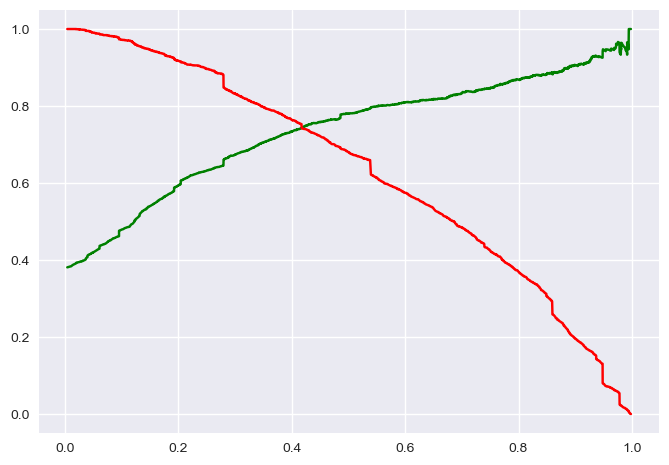

In [443]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div class="alert alert-block alert-info">
<b>Inference</b>

<b>Threshold value for the model will balance a good precison and recall is 0.41. Metrices will be created 
    with the threshold of 0.41</b>

</div>

In [444]:
y_train_pred_final.head()

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.38
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0


In [445]:
# Now will calculate Metrices for the threshold of 0.41
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_pred_final['precision_recall_prediction'] = y_train_pred_final[
    'Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.38,precision_recall_prediction
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0,1,1
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0


In [446]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_original, 
                                     y_train_pred_final['precision_recall_prediction'] )
print(confusion)

[[3345  657]
 [ 599 1867]]


In [447]:
metirices(confusion,'precision_recall_prediction')

Accuracy : 80.58132343846628
Sensitity :  75.70965125709651
Specificity :  83.5832083958021
False Positive Rate :  16.4167916041979
precision :  73.96988906497623


<div class="alert alert-block alert-info">
<b>Inference</b>

<b>Sensitity and Sensitity are more in the cutoff of 0.38, hence the final threshold will be 0.38</b>

</div>

In [448]:
y_train_pred_final.head()

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.38,precision_recall_prediction
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0,1,1
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0


<h2 align="left"> <font color='brown'>Lead Score Calculation</font></h2>

In [449]:
# Adding Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted_original,Converted_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.38,precision_recall_prediction,Lead_Score
1871,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0,28
6795,0,0.256209,0,1,1,1,0,0,0,0,0,0,0,0,0,26
3516,0,0.324513,0,1,1,1,1,0,0,0,0,0,0,0,0,32
8105,0,0.823325,1,1,1,1,1,1,1,1,1,1,0,1,1,82
3934,0,0.279353,0,1,1,1,0,0,0,0,0,0,0,0,0,28


<h2 align="left"> <font color='brown'>Prediction</font></h2>

### Scaling

In [450]:
scale_features(X_test)

In [451]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Free_interview_copy,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Google,LeadSource_Others,...,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
4269,-0.298654,2.212229,0.933036,-0.67689,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,-0.298654,-1.207427,-0.900812,-0.67689,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7766,-0.298654,0.929858,-0.793792,-0.67689,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9199,-0.298654,-1.207427,-0.900812,-0.67689,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4359,-0.298654,-1.207427,-0.900812,-0.67689,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Removing columns

In [452]:
# using selected columns by RFE
X_test_rfe_selected = X_test[selected_column]
X_test_rfe_selected.shape

(2772, 20)

In [454]:
# Removed other features that has been removed manually by checking p value and VIF
X_test_rfe_selected.drop(drop_features,axis=1,inplace=True)

In [455]:
X_test_rfe_selected.shape

(2772, 15)

In [456]:
# Adding contant value
X_test_with_constant = sm.add_constant(X_test_rfe_selected)
X_test_with_constant.shape

(2772, 16)

In [457]:
# making prediction using model 3 (final model)
y_test_pred = model_3.predict(X_test_with_constant)
y_test_pred.head(10)

4269    0.639940
2376    0.947631
7766    0.271998
9199    0.093897
4359    0.857517
9186    0.565252
1631    0.491586
8963    0.178197
8007    0.040365
5324    0.344230
dtype: float64

In [460]:
# Converted predicted values to data frame
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.639940
2376,0.947631
7766,0.271998
9199,0.093897
4359,0.857517


In [461]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [462]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.639940
1,1,2376,0.947631
2,1,7766,0.271998
3,0,9199,0.093897
4,1,4359,0.857517


In [463]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.639940
1,2376,1,0.947631
2,7766,1,0.271998
3,9199,0,0.093897
4,4359,1,0.857517


In [464]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.639940,1
1,2376,1,0.947631,1
2,7766,1,0.271998,0
3,9199,0,0.093897,0
4,4359,1,0.857517,1


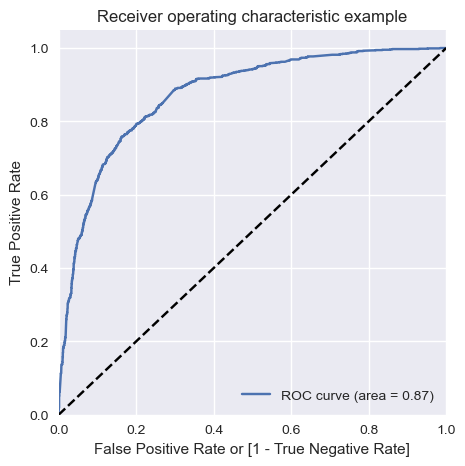

In [465]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [470]:
# Test model evaluation

# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion_matrix_test

array([[1381,  296],
       [ 255,  840]])

In [471]:
def metirices_test(confusion_matrix):
    TN = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TP = confusion_matrix[1,1]
    
    print('Accuracy :',metrics.accuracy_score(y_pred_final.Converted, 
                                                       y_pred_final['final_predicted'])*100)
    print('Sensitity : ',(TP / float(TP+FN))*100)
    print('Specificity : ', (TN / float(TN+FP))*100)
    print('False Positive Rate : ',(FP/ float(TN+FP))*100)
    print('precision : ',(TP / float(TP+FP))*100)

    
metirices_test(confusion_matrix_test)

Accuracy : 80.12265512265512
Sensitity :  76.71232876712328
Specificity :  82.34943351222421
False Positive Rate :  17.65056648777579
precision :  73.94366197183099


<div class="alert alert-block alert-info">
<b>Inference</b>

<b>Metrices of train and test data set is close. Hence model is performing good</b>
    
<li>Accuracy : 80 % </li>
<li>Sensitity :  77 %</li>
<li>Specificity :  82 %</li>
<li>False Positive Rate :  18 %</li>
<li>precision :  74 %</li>

</div>

In [473]:
# Adding Lead Score in test dataset
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.639940,1,64
1,2376,1,0.947631,1,95
2,7766,1,0.271998,0,27
3,9199,0,0.093897,0,9
4,4359,1,0.857517,1,86


In [456]:
# features and their coefficicent from final model
parameters=model_3.params.sort_values(ascending=False)
parameters

Lead Add Form                  3.877663
SMS Sent                       2.413189
others                         2.293974
Working Professional           1.634604
Unreachable                    1.362865
Email Opened                   1.296584
Olark Chat                     1.132393
Total Time Spent on Website    1.107753
Page Visited on Website        0.793202
Unemployed                     0.746166
Email Link Clicked             0.694809
Do Not Email                  -0.312832
Hospitality Management        -0.875683
const                         -3.217171
dtype: float64

<h1 align="left"><font color='green'>Summary</font></h1>
<br>
<li>Customers with higher lead scores are more likely to convert and vice versa</li>
<li>The sensitivity and accuracy of the model is close to 80 %</li>
<li>Lead Add Form and SMS Sent are the top features for the consideration of high convertion rate</li>

<h1 align="left"><font color='green'>Recomendation</font></h1><br>
<li>Prioritize features with positive coefficients for targeted marketing</li>
<li> Give tailor messages for working professionals, optimize communication channels and aggressively target working professionals for higher conversion rates</li>
